In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import itertools

In [8]:
median_income = pd.read_csv('median_with_mean.csv')

In [9]:
median_income

,Unnamed: 0,Estimate; INCOME IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),mean
0,0,54045,53764,57160,59764,61512,57249.0
1,1,85385,82307,86376,88604,86831,85900.6
2,2,57163,59700,61042,63877,67886,61933.6
3,3,50415,51528,52449,55484,57421,53459.4
4,4,68222,71015,73581,77359,82009,74437.2
5,5,72043,75405,78384,80761,84918,78302.2
6,6,85563,88819,91388,94449,93870,90817.8
7,7,69394,72594,74931,74251,77082,73650.4
8,8,72337,84094,94846,98498,106528,91260.6
9,9,55774,57212,59339,61289,64003,59523.4


In [10]:
gini = pd.read_csv('gini_with_mean.csv')

In [11]:
gini

,Unnamed: 0,State,Gini_Index_Est_2013,Gini_Index_Est_2014,Gini_Index_Est_2015,Gini_Index_Est_2016,Gini_Index_Est_2017,mean
0,0,Alabama,0.4729,0.4740,0.4740,0.4740,0.4740,0.47378
1,1,Alaska,0.4143,0.4146,0.4146,0.4146,0.4146,0.41454
2,2,Arizona,0.4585,0.4614,0.4614,0.4614,0.4614,0.46082
3,3,Arkansas,0.4646,0.4661,0.4661,0.4661,0.4661,0.46580
4,4,California,0.4782,0.4823,0.4823,0.4823,0.4823,0.48148
5,5,Colorado,0.4568,0.4584,0.4584,0.4584,0.4584,0.45808
6,6,Connecticut,0.4874,0.4919,0.4919,0.4919,0.4919,0.49100
7,7,Delaware,0.4410,0.4433,0.4433,0.4433,0.4433,0.44284
8,8,District of Columbia,0.5303,0.5295,0.5295,0.5295,0.5295,0.52966
9,9,Florida,0.4782,0.4812,0.4812,0.4812,0.4812,0.48060


In [27]:
left = gini
right = median_income
avg_ginis_medians = left.merge(right, on=('Unnamed: 0'), suffixes=('_gini', '_median'))

KeyError: 'Unnamed: 0'

In [19]:
avg_ginis_medians.head()

,Unnamed: 0,State,Gini_Index_Est_2013,Gini_Index_Est_2014,Gini_Index_Est_2015,Gini_Index_Est_2016,Gini_Index_Est_2017,mean_gini,Estimate; INCOME IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),Estimate; INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars),mean_medians
0,0,Alabama,0.4729,0.4740,0.4740,0.4740,0.4740,0.47378,54045,53764,57160,59764,61512,57249.0
1,1,Alaska,0.4143,0.4146,0.4146,0.4146,0.4146,0.41454,85385,82307,86376,88604,86831,85900.6
2,2,Arizona,0.4585,0.4614,0.4614,0.4614,0.4614,0.46082,57163,59700,61042,63877,67886,61933.6
3,3,Arkansas,0.4646,0.4661,0.4661,0.4661,0.4661,0.46580,50415,51528,52449,55484,57421,53459.4
4,4,California,0.4782,0.4823,0.4823,0.4823,0.4823,0.48148,68222,71015,73581,77359,82009,74437.2


In [25]:
mean_ginis_medians = avg_ginis_medians.drop(['Unnamed: 0', 'Gini_Index_Est_2013', 'Gini_Index_Est_2014','Gini_Index_Est_2015', 'Gini_Index_Est_2016', 'Gini_Index_Est_2017', 'Estimate; INCOME IN THE PAST 12 MONTHS (IN 2013 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars)', 'Estimate; INCOME IN THE PAST 12 MONTHS (IN 2014 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars)', 'Estimate; INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars)', 'Estimate; INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars)', 'Estimate; INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS) - Families - Median family income (dollars)'], axis=1)

In [28]:
mean_ginis_medians.to_csv('mean_ginis_medians.csv')

In [35]:
mean_ginis_medians

,State,mean_gini,mean_medians
0,Alabama,0.47378,57249.0
1,Alaska,0.41454,85900.6
2,Arizona,0.46082,61933.6
3,Arkansas,0.46580,53459.4
4,California,0.48148,74437.2
5,Colorado,0.45808,78302.2
6,Connecticut,0.49100,90817.8
7,Delaware,0.44284,73650.4
8,District of Columbia,0.52966,91260.6
9,Florida,0.48060,59523.4


In [30]:
mean_gini_medians_pearson = mean_ginis_medians.corr(method='pearson')

In [31]:
mean_gini_medians_pearson
#now the gini and median are not correlated

,mean_gini,mean_medians
mean_gini,1.000000,-0.044451
mean_medians,-0.044451,1.000000


Merge with kaggle %trump voter

In [32]:
kaggle = pd.read_csv('hate_crimes.csv')

In [33]:
kaggle

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986
5,Colorado,60940,0.040,0.80,0.893,0.06,0.07,0.457,0.31,0.44,0.390523,2.804689
6,Connecticut,70161,0.052,0.94,0.886,0.06,0.06,0.486,0.30,0.41,0.335392,3.772701
7,Delaware,57522,0.049,0.90,0.874,0.05,0.08,0.440,0.37,0.42,0.322754,1.469980
8,District of Columbia,68277,0.067,1.00,0.871,0.11,0.04,0.532,0.63,0.04,1.522302,10.953480
9,Florida,46140,0.052,0.96,0.853,0.09,0.11,0.474,0.46,0.49,0.187521,0.698070


In [39]:
left = mean_ginis_medians
right = kaggle
kaggle_means = left.set_index('State').join(right.set_index('state'))

In [48]:
kaggle_means.head()

,mean_gini,mean_medians,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
State,,,,,,,,,,,,,
Alabama,0.47378,57249.0,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
Alaska,0.41454,85900.6,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
Arizona,0.46082,61933.6,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
Arkansas,0.46580,53459.4,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
California,0.48148,74437.2,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [67]:
kaggle_means_cleaner = kaggle_means.drop(['gini_index','median_household_income','hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi'], axis=1)

In [72]:
kaggle_means_cleaner.to_csv('kaggle_means_cleaner.csv')

In [61]:
kaggle_means_cleaner_pearson = kaggle_means_cleaner.corr(method='pearson')

In [71]:
kaggle_means_cleaner_pearson

,mean_gini,mean_medians,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump
mean_gini,1.000000,-0.044451,0.518920,0.509103,-0.624417,0.469673,0.088998,0.425317,-0.359895
mean_medians,-0.044451,1.000000,-0.265492,0.351810,0.575871,0.388443,-0.772365,0.153386,-0.628142
share_unemployed_seasonal,0.518920,-0.265492,1.000000,0.358113,-0.621168,0.278899,0.209440,0.431847,-0.148192
share_population_in_metro_areas,0.509103,0.351810,0.358113,1.000000,-0.268846,0.745464,-0.385559,0.547672,-0.570695
share_population_with_high_school_degree,-0.624417,0.575871,-0.621168,-0.268846,1.000000,-0.277009,-0.494008,-0.434846,-0.155656
share_non_citizen,0.469673,0.388443,0.278899,0.745464,-0.277009,1.000000,-0.389718,0.733655,-0.631194
share_white_poverty,0.088998,-0.772365,0.209440,-0.385559,-0.494008,-0.389718,1.000000,-0.269449,0.552849
share_non_white,0.425317,0.153386,0.431847,0.547672,-0.434846,0.733655,-0.269449,1.000000,-0.488838
share_voters_voted_trump,-0.359895,-0.628142,-0.148192,-0.570695,-0.155656,-0.631194,0.552849,-0.488838,1.000000


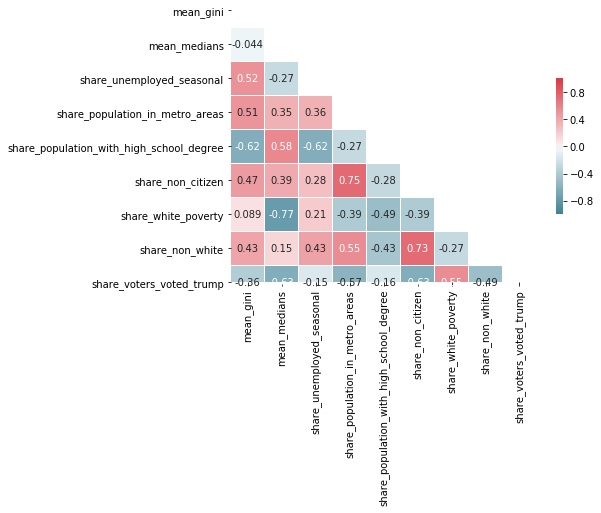

In [63]:
mask = np.zeros_like(kaggle_means_cleaner_pearson, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#this sets up the figure
f, ax = plt.subplots(figsize=(7, 5))

#this is a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(kaggle_means_cleaner_pearson, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [64]:
hate_crimes = pd.read_csv('Yearly Hate Crimes.csv')

In [65]:
hate_crimes

,Unnamed: 0,State,2013,2014,2015,2016,2017,2018,Average
0,0,Alabama,0.000005,1.132210e-05,0.000008,0.000014,0.000003,0.000000,0.000007
1,1,Alaska,0.000011,8.192600e-06,0.000011,0.000015,0.000005,0.000010,0.000010
2,2,Arizona,0.000024,4.119010e-05,0.000042,0.000033,0.000039,0.000023,0.000034
3,3,Arkansas,0.000010,3.005500e-06,0.000002,0.000004,0.000002,0.000005,0.000004
4,4,California,0.000022,1.956060e-05,0.000021,0.000024,0.000028,0.000027,0.000024
5,5,Colorado,0.000025,1.822120e-05,0.000020,0.000019,0.000019,0.000022,0.000020
6,6,Connecticut,0.000041,3.643730e-05,0.000027,0.000030,0.000031,0.000026,0.000032
7,7,Delaware,0.000013,1.389460e-05,0.000012,0.000016,0.000030,0.000017,0.000017
8,8,District of Columbia,0.000111,1.062388e-04,0.000097,0.000169,0.000278,0.000303,0.000177
9,9,Florida,0.000004,3.283800e-06,0.000013,0.000011,0.000007,0.000007,0.000008


In [73]:
kaggle_means_cleaner = pd.read_csv('kaggle_means_cleaner.csv')

In [76]:
kaggle_means_cleaner.head()

,State,mean_gini,mean_medians,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump
0,Alabama,0.47378,57249.0,0.060,0.64,0.821,0.02,0.12,0.35,0.63
1,Alaska,0.41454,85900.6,0.064,0.63,0.914,0.04,0.06,0.42,0.53
2,Arizona,0.46082,61933.6,0.063,0.90,0.842,0.10,0.09,0.49,0.50
3,Arkansas,0.46580,53459.4,0.052,0.69,0.824,0.04,0.12,0.26,0.60
4,California,0.48148,74437.2,0.059,0.97,0.806,0.13,0.09,0.61,0.33


In [77]:
left = kaggle_means_cleaner
right = hate_crimes
gini_income_crime = left.set_index('State').join(right.set_index('State'))

In [108]:
gini_income_crime

,mean_gini,mean_medians,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,Unnamed: 0,2013,2014,2015,2016,2017,2018,Average
State,,,,,,,,,,,,,,,,,
Alabama,0.47378,57249.0,0.060,0.64,0.821,0.02,0.12,0.35,0.63,0.0,0.000005,1.132210e-05,0.000008,0.000014,0.000003,0.000000,0.000007
Alaska,0.41454,85900.6,0.064,0.63,0.914,0.04,0.06,0.42,0.53,1.0,0.000011,8.192600e-06,0.000011,0.000015,0.000005,0.000010,0.000010
Arizona,0.46082,61933.6,0.063,0.90,0.842,0.10,0.09,0.49,0.50,2.0,0.000024,4.119010e-05,0.000042,0.000033,0.000039,0.000023,0.000034
Arkansas,0.46580,53459.4,0.052,0.69,0.824,0.04,0.12,0.26,0.60,3.0,0.000010,3.005500e-06,0.000002,0.000004,0.000002,0.000005,0.000004
California,0.48148,74437.2,0.059,0.97,0.806,0.13,0.09,0.61,0.33,4.0,0.000022,1.956060e-05,0.000021,0.000024,0.000028,0.000027,0.000024
Colorado,0.45808,78302.2,0.040,0.80,0.893,0.06,0.07,0.31,0.44,5.0,0.000025,1.822120e-05,0.000020,0.000019,0.000019,0.000022,0.000020
Connecticut,0.49100,90817.8,0.052,0.94,0.886,0.06,0.06,0.30,0.41,6.0,0.000041,3.643730e-05,0.000027,0.000030,0.000031,0.000026,0.000032
Delaware,0.44284,73650.4,0.049,0.90,0.874,0.05,0.08,0.37,0.42,7.0,0.000013,1.389460e-05,0.000012,0.000016,0.000030,0.000017,0.000017
District of Columbia,0.52966,91260.6,0.067,1.00,0.871,0.11,0.04,0.63,0.04,8.0,0.000111,1.062388e-04,0.000097,0.000169,0.000278,0.000303,0.000177


In [104]:
gini_income_crime_avs = gini_income_crime.drop(['Unnamed: 0','2013','2014', '2015', '2016', '2017', '2018', 'share_non_citizen'], axis=1)

In [105]:
gini_income_crime_avs.head()

,mean_gini,mean_medians,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_white_poverty,share_non_white,share_voters_voted_trump,Average
State,,,,,,,,,
Alabama,0.47378,57249.0,0.060,0.64,0.821,0.12,0.35,0.63,0.000007
Alaska,0.41454,85900.6,0.064,0.63,0.914,0.06,0.42,0.53,0.000010
Arizona,0.46082,61933.6,0.063,0.90,0.842,0.09,0.49,0.50,0.000034
Arkansas,0.46580,53459.4,0.052,0.69,0.824,0.12,0.26,0.60,0.000004
California,0.48148,74437.2,0.059,0.97,0.806,0.09,0.61,0.33,0.000024


In [106]:
gini_income_crime_avs = gini_income_crime_avs.rename(columns = {'Average': 'share_hate_crimes_per_pop'})

In [107]:
gini_income_crime_avs.to_csv('gini_income_crime_avs.csv')

In [103]:
gini_income_crime_avs.head()

,mean_gini,mean_medians,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,share_hate_crimes_per_pop
State,,,,,,,,,,
Alabama,0.47378,57249.0,0.060,0.64,0.821,0.02,0.12,0.35,0.63,0.000007
Alaska,0.41454,85900.6,0.064,0.63,0.914,0.04,0.06,0.42,0.53,0.000010
Arizona,0.46082,61933.6,0.063,0.90,0.842,0.10,0.09,0.49,0.50,0.000034
Arkansas,0.46580,53459.4,0.052,0.69,0.824,0.04,0.12,0.26,0.60,0.000004
California,0.48148,74437.2,0.059,0.97,0.806,0.13,0.09,0.61,0.33,0.000024


In [92]:
gini_income_crime_avs_pearson = gini_income_crime_avs.corr(method='pearson')

In [93]:
gini_income_crime_avs_pearson

,mean_gini,mean_medians,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,share_non_white,share_voters_voted_trump,hate_crimes_rate_per_pop
mean_gini,1.000000,-0.044957,0.824653,0.726729,-0.734147,0.702273,0.001508,0.757697,-0.497978,0.534894
mean_medians,-0.044957,1.000000,-0.375205,0.501056,0.654135,0.534752,-0.973522,0.291377,-0.813494,0.618983
share_unemployed_seasonal,0.824653,-0.375205,1.000000,0.509384,-0.878544,0.464404,0.288162,0.650297,-0.178047,0.176980
share_population_in_metro_areas,0.726729,0.501056,0.509384,1.000000,-0.292727,0.963889,-0.580417,0.889525,-0.836758,0.562702
share_population_with_high_school_degree,-0.734147,0.654135,-0.878544,-0.292727,1.000000,-0.264080,-0.573610,-0.486308,-0.145321,0.121382
share_non_citizen,0.702273,0.534752,0.464404,0.963889,-0.264080,1.000000,-0.608185,0.933744,-0.868207,0.601187
share_white_poverty,0.001508,-0.973522,0.288162,-0.580417,-0.573610,-0.608185,1.000000,-0.400888,0.819689,-0.560650
share_non_white,0.757697,0.291377,0.650297,0.889525,-0.486308,0.933744,-0.400888,1.000000,-0.714016,0.447077
share_voters_voted_trump,-0.497978,-0.813494,-0.178047,-0.836758,-0.145321,-0.868207,0.819689,-0.714016,1.000000,-0.832999
hate_crimes_rate_per_pop,0.534894,0.618983,0.176980,0.562702,0.121382,0.601187,-0.560650,0.447077,-0.832999,1.000000


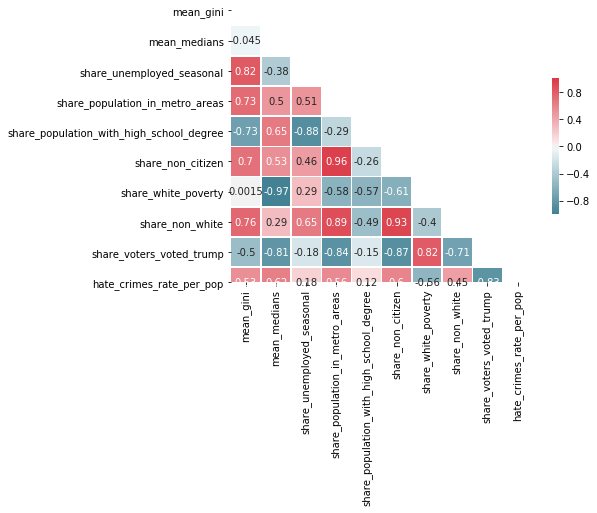

In [94]:
mask = np.zeros_like(gini_income_crime_avs_pearson, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#this sets up the figure
f, ax = plt.subplots(figsize=(7, 5))

#this is a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(gini_income_crime_avs_pearson, mask=mask, cmap=cmap, vmin= -1, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})